# Stcok Sentiment Analysis

### Main Codes 

In [1]:
#import all the required packages 
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import yfinance as yf
from nrclex import NRCLex
from wordcloud import WordCloud, STOPWORDS #word clouds
from datetime import date
import mplfinance as mpf

#main brain (processes the givin tickers )
tickerHolder = str.upper(input("Enter a Ticker! or Just Enter to end the list.   "))

#scrape data from finviz
finviz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}
url = finviz_url + tickerHolder
req = Request(url=url, headers={'user-agent': 'my-app'})
response = urlopen(req)
html = BeautifulSoup(response, features='html.parser')
news_table = html.find(id='news-table')
news_tables[tickerHolder] = news_table
#turn data into clean table
parsed_data = []
for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title_tag = row.find('a')
        if title_tag:
            title = title_tag.text
        date_data = row.td.text.split() #save all date datas
        if len(date_data) == 1 :
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
        parsed_data.append([ticker, date, time, title])
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df = df[df['date']=='Today'] #filter for current 'Today' data
df['time'] = pd.to_datetime(df.time).dt.time ## convert to corrct time format
from datetime import date, timedelta
date_when = date.today()# to save current date to save charts

##display results
print(ticker)
print(df[['time','title']]) #prints tickers dataframeend

META
        time                                              title
0   16:19:00  3 Metaverse Stocks to Sell in July Before They...
1   16:00:00  As Nvidia Rises, Two Mag 7 Stocks Remain In Bu...
2   13:28:00  Metas Top Line Will Rise Strongly, Say Ad-Spen...
3   13:25:00  Magnificent Seven Stocks: Nvidia Stock Rallies...
4   12:49:00  Taiwan Semiconductor, Meta get bullish calls: ...
5   11:38:00  Taiwan Semiconductor, Meta get bullish calls: ...
6   11:38:00  Meta Platform's (META) Strong Threads Portfoli...
7   10:41:00  Meta receives price target boost from Wells Fargo
8   08:45:00  Better Adtech Stock to buy in the Second Half ...
9   08:03:00     5 Things to Know Before the Stock Market Opens
10  08:00:00  Unlocking Intrinsic Value: Analysis of Meta Pl...
11  07:40:00  Watch These Meta Platforms Price Levels After ...
12  07:10:00  Boeing to plead guilty to criminal fraud, Para...


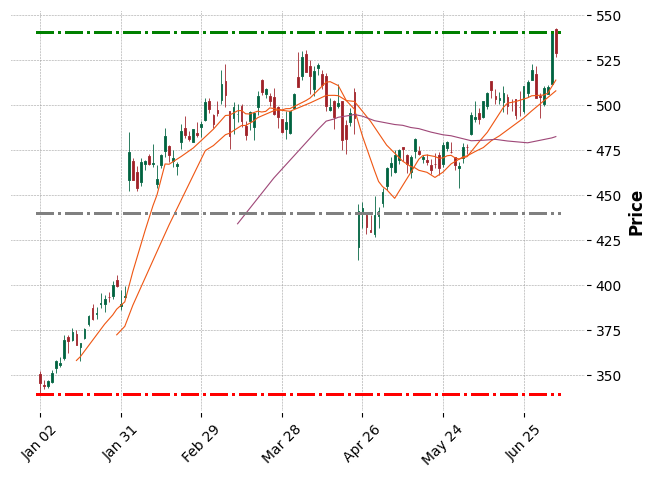

In [2]:
##ticker price chart
security = yf.Ticker(tickerHolder)
daily = security.history(period='ytd',interval='1d')
daily = daily[['Open', 'High', 'Low', 'Close', 'Volume']]
highs = daily['High'][:-1].max()
lows = daily['Low'][:-1].min()

#plot charts
mpf.plot(daily, type='candle',style='charles', mav=(10,20,50),hlines=dict(hlines=[highs,(highs+lows)/2,lows],colors=['g','gray','r'],linestyle='-.')) 

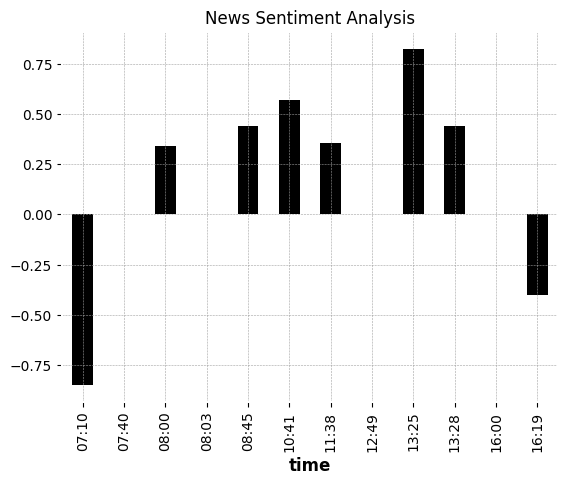

In [3]:
import seaborn as sns
##vader sentiment analysis
vader = SentimentIntensityAnalyzer()
df['compound'] = df['title'].apply(lambda title: vader.polarity_scores(title)['compound'])
mean_df = df.groupby(['ticker', 'time']).mean(numeric_only=True).unstack()
senti_df = mean_df.xs('compound', axis="columns").transpose()#.sort_values(by='time',ascending=True)

fig, ax = plt.subplots()
senti_df.plot(ax=ax, kind='bar',title='News Sentiment Analysis',legend=False,color='Black')
ax.set_xticklabels([t.strftime('%H:%M') for t in senti_df.index]) #'%I:%M %p'
plt.show()

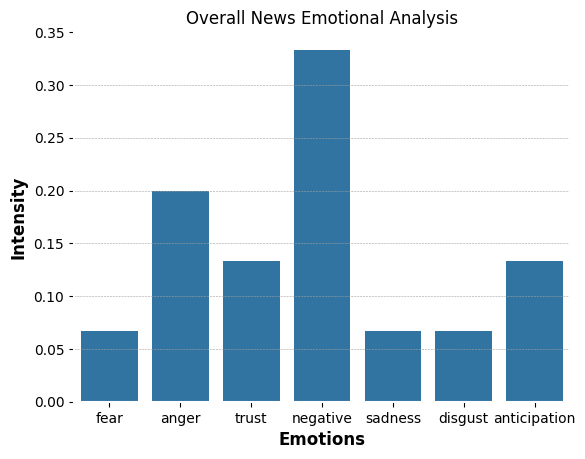

In [4]:
# Concatenate all rows from the title column
whole_text = df['title'].str.cat(sep='. ')
def emotionAnalysis(whole_text):
    # Get the emotion frequencies
    emotions = NRCLex(whole_text).affect_frequencies

    # Filter and plot the non-zero emotions in one step
    sns.barplot(x=[k for k, v in emotions.items() if v != 0], 
                 y=[v for k, v in emotions.items() if v != 0])

    plt.xlabel('Emotions')
    plt.ylabel('Intensity')
    plt.title('Overall News Emotional Analysis')
    plt.show()
try:
    emotionAnalysis(whole_text)
except ValueError:
    print("No data to analyze")

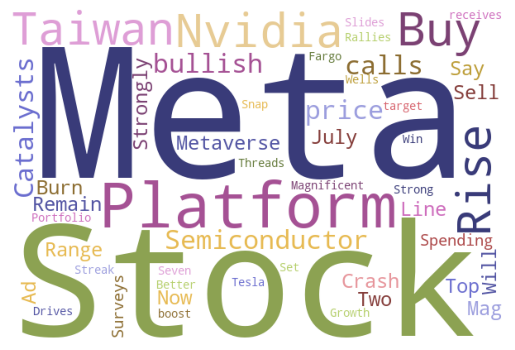

In [5]:
# Word Cloud
topWords = 50
stopwords = set(STOPWORDS)
wc = WordCloud(stopwords=stopwords,background_color="white",colormap='tab20b', max_words=topWords,width=600,height=400).generate(whole_text).to_image()
plt.imshow(wc)
plt.axis("off")
plt.show()

# Gems

In [6]:
security = yf.Ticker(tickerHolder)
testdf = pd.DataFrame(security.quarterly_cashflow)
testdf.head()

,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Free Cash Flow,12846000000.0,11739000000.0,13859000000.0,11074000000.0,7175000000.0,NaN
Repurchase Of Capital Stock,-15008000000.0,-5942000000.0,-3569000000.0,-898000000.0,-9365000000.0,NaN
Repayment Of Debt,-315000000.0,-307000000.0,-267000000.0,-220000000.0,-264000000.0,NaN
Issuance Of Debt,NaN,0.0,0.0,NaN,NaN,0.0
Capital Expenditure,-6400000000.0,-7665000000.0,-6543000000.0,-6235000000.0,-6823000000.0,NaN


In [35]:
testdf[testdf.columns[0:4]].loc['Free Cash Flow'].sum() #TTM Free Cash Flow

49518000000.0

In [14]:
security.history_metadata['regularMarketPrice'] #close price
#security.history_metadata['regularMarketVolume'] # volume

529.32

In [9]:
security.history_metadata.keys()

dict_keys(['currency', 'symbol', 'exchangeName', 'fullExchangeName', 'instrumentType', 'firstTradeDate', 'regularMarketTime', 'hasPrePostMarketData', 'gmtoffset', 'timezone', 'exchangeTimezoneName', 'regularMarketPrice', 'fiftyTwoWeekHigh', 'fiftyTwoWeekLow', 'regularMarketDayHigh', 'regularMarketDayLow', 'regularMarketVolume', 'chartPreviousClose', 'previousClose', 'scale', 'priceHint', 'currentTradingPeriod', 'tradingPeriods', 'dataGranularity', 'range', 'validRanges'])

In [134]:
security = yf.Ticker('AAPL')
stockFCF = pd.DataFrame(security.quarterly_cashflow)

In [135]:
FCF= stockFCF[stockFCF.columns[0:4]].loc['Free Cash Flow'].sum() #TTM Free Cash Flow
FCF #TTM Free Cash Flow in Millions

101919000000.0

In [136]:
stockBAL = pd.DataFrame(security.quarterly_balance_sheet)
totalCash = stockBAL[stockBAL.columns[0:1]].loc['Cash Cash Equivalents And Short Term Investments'].values[0]
totalCash

67150000000.0

In [137]:
'Current Debt And Capital Lease Obligation','Long Term Debt And Capital Lease Obligation'

('Current Debt And Capital Lease Obligation',
 'Long Term Debt And Capital Lease Obligation')

In [138]:
shortTerm = stockBAL[stockBAL.columns[0:1]].loc['Current Debt And Capital Lease Obligation'].values[0] 
longTerm = stockBAL[stockBAL.columns[0:1]].loc['Long Term Debt And Capital Lease Obligation'].values[0]
totalDebt = shortTerm + longTerm
totalDebt

104590000000.0

In [139]:
stockNetincome = pd.DataFrame(security.quarterly_income_stmt)
NetIncome = stockNetincome[stockNetincome.columns[0:4]].loc['Net Income From Continuing And Discontinued Operation'].sum()
NetIncome

100389000000.0

In [140]:
OutStandingShares = stockBAL[stockBAL.columns[0:1]].loc['Ordinary Shares Number'].values[0]
OutStandingShares

15337686000.0